<a href="https://colab.research.google.com/github/mhlaghari/Mini-CIFAR-PyTorch-Vision/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision Analysis using PyTorch on CIFAR10 dataset

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

To learn more about the dataset [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In [1]:
# Import pytorch
import torch
from torch import nn

#Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplotlib.pyplot
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.0.1+cu118
0.15.2+cu118


## 1. Getting the Dataset

In [2]:
#setup training data
train_data = datasets.CIFAR10(
    root='data',
    train=True, #Since this is the training dataset
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

# Now we do the same with test dataset
test_data = datasets.CIFAR10(
    root='data',
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

100%|██████████| 170498071/170498071 [00:02<00:00, 59602708.02it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [3]:
len(train_data), len(test_data)

(50000, 10000)

In [4]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
          [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
          [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
          ...,
          [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
          [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
          [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],
 
         [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
          [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
          [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
          ...,
          [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
          [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
          [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],
 
         [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
          [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
          [0.0824, 0.0000, 0.0314,  ...,

In [5]:
class_names = train_data.classes
class_to_idx = train_data.class_to_idx
class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [6]:
# Check the shape of our image
print(f"Image Shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image Shape: torch.Size([3, 32, 32]) -> [color_channels, height, width]
Image label: frog


In [7]:
image.shape

torch.Size([3, 32, 32])

## 1.2 Visualizing our data

Image shape: torch.Size([3, 32, 32])


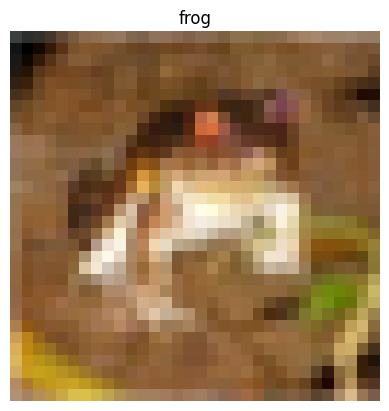

In [8]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.permute(1, 2, 0))
plt.title(class_names[label])
plt.axis(False);
# image

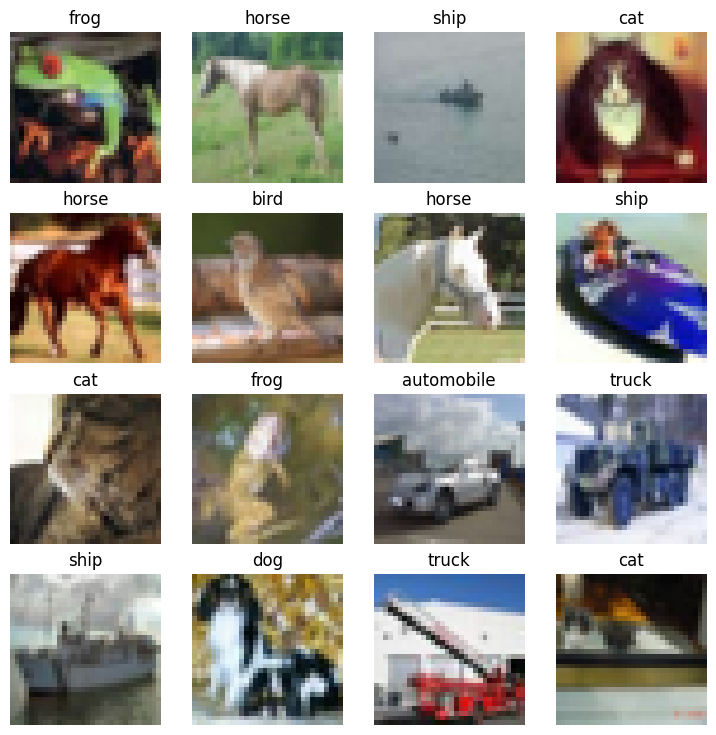

In [9]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.permute(1, 2, 0))
  plt.title(class_names[label])
  plt.axis(False);

## 2. Prepare DataLoader

In [10]:
from torch.utils.data import DataLoader

#Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x785230acaef0>,
 <torch.utils.data.dataloader.DataLoader at 0x785230ab5e70>)

In [ ]:
# Lets check out what we've created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

In [11]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

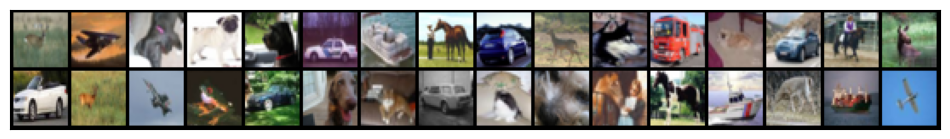

In [12]:
show_batch(train_dataloader)

In [13]:
# Check out whats inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 3, 32, 32]), torch.Size([32]))

In [14]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)

# Print out what happened
print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([3, 32, 32])
Shape after flattening: torch.Size([3, 1024])


In [34]:

import torch
from torch import nn

class TinyVGG(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*8*8,
                  out_features=output_shape))

  def forward(self, x):
    x = self.conv_block_1(x)
    #print(f"Layer 1 shape: {x.shape}")
    x = self.conv_block_2(x)
    #print(f"Layer 2 shape: {x.shape}")
    x = self.classifier(x)
    #print(f"Layer 3 shape: {x.shape}")
    return x

In [17]:
device = "cuda" if torch.cuda.is_available else "cpu"
device

'cuda'

In [26]:

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):

  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader and data batches
  for batch, (X, y) in enumerate(dataloader):
    # Send data to target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)
    # print(y_pred)

    # 2. Calculate and accumulate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate and accumualte accuracy metric across all batches
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and average accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [27]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):

  # Put model in eval mode
  model.eval()

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):
      # Send data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)
      # print(test_pred_logits)

      # 2. Calculuate and accumulate loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # Calculate and accumulate accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

In [28]:

from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)

    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results

In [51]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

loss_fn=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.001)

model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        epochs=5)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.6695 | train_acc: 0.3973 | test_loss: 1.4209 | test_acc: 0.4811
Epoch: 2 | train_loss: 1.3436 | train_acc: 0.5197 | test_loss: 1.3064 | test_acc: 0.5277
Epoch: 3 | train_loss: 1.2452 | train_acc: 0.5594 | test_loss: 1.2143 | test_acc: 0.5644
Epoch: 4 | train_loss: 1.1847 | train_acc: 0.5803 | test_loss: 1.1651 | test_acc: 0.5844
Epoch: 5 | train_loss: 1.1350 | train_acc: 0.5981 | test_loss: 1.1271 | test_acc: 0.6019


In [36]:
# Get a custom image
custom_image = "/content/9DAC4952-4CCA-4945-919D-FFC6313F6840_1_201_a.jpeg"

In [47]:
# Load the image
import torchvision
img = torchvision.io.read_image(custom_image)
img

tensor([[[197, 203, 200,  ..., 200, 200, 200],
         [ 45,  42,  44,  ...,   6,   7,   8],
         [ 43,  36,  40,  ...,   6,   7,   7],
         ...,
         [ 10,   9,   9,  ...,   8,  10,  10],
         [ 10,   9,   8,  ...,   7,   8,   9],
         [ 10,   8,   7,  ...,   9,  10,  10]],

        [[194, 200, 197,  ..., 200, 200, 200],
         [ 42,  39,  41,  ...,   6,   7,   8],
         [ 40,  33,  37,  ...,   5,   6,   6],
         ...,
         [  9,   8,   8,  ...,   7,   9,   9],
         [  9,   8,   7,  ...,   6,   7,   8],
         [  9,   7,   6,  ...,   8,   9,   9]],

        [[203, 209, 206,  ..., 202, 202, 202],
         [ 51,  48,  50,  ...,   8,   9,  10],
         [ 49,  42,  46,  ...,  10,  11,  11],
         ...,
         [ 14,  13,  13,  ...,  12,  14,  14],
         [ 14,  13,  12,  ...,  11,  12,  13],
         [ 14,  12,  11,  ...,  13,  14,  14]]], dtype=torch.uint8)

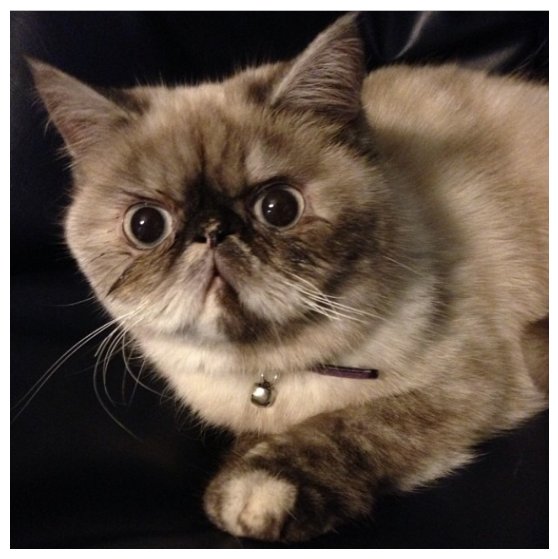

In [38]:
# View the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0)) # matplotlib likes images in HWC (height, width, color_channels) format not CHW (color_channels, height, width)
plt.axis(False);

In [39]:
img.shape

torch.Size([3, 640, 639])

In [45]:
def evaluate(model, img):
  # Make a prediction on the image
  model.eval()
  with torch.inference_mode():
    # Get image pixels into float + between 0 and 1
    img = img / 255.

    # Resize image to 64x64
    resize = transforms.Resize((32, 32))
    img = resize(img)

    # Turn image in single batch and pass to target device
    batch = img.unsqueeze(0).to(device)

    # Predict on image
    y_pred_logit = model(batch)

    # Convert pred logit to pred label
    # pred_label = torch.argmax(torch.softmax(y_pred_logit, dim=1), dim=1)
    pred_label = torch.argmax(y_pred_logit, dim=1) # get same results as above without torch.softmax

  # Plot the image and prediction
  plt.imshow(img.permute(1, 2, 0))
  plt.title(f"Pred label: {class_names[pred_label]}")
  plt.axis(False);

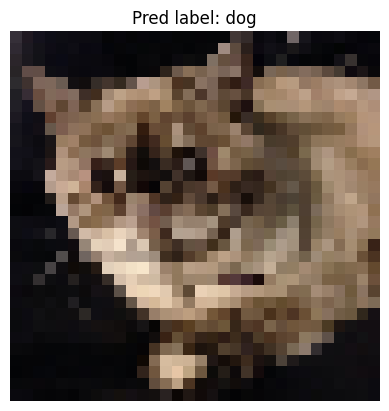

In [48]:
evaluate(model_0,img)

# 🤦‍♂️ WRONG PREDICTION

Lets train the same model for longer and lets see if it predicts right now

In [41]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

loss_fn=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.001)

model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.6806 | train_acc: 0.3934 | test_loss: 1.4333 | test_acc: 0.4811
Epoch: 2 | train_loss: 1.3685 | train_acc: 0.5143 | test_loss: 1.3106 | test_acc: 0.5304
Epoch: 3 | train_loss: 1.2637 | train_acc: 0.5512 | test_loss: 1.2376 | test_acc: 0.5566
Epoch: 4 | train_loss: 1.1947 | train_acc: 0.5781 | test_loss: 1.1761 | test_acc: 0.5816
Epoch: 5 | train_loss: 1.1382 | train_acc: 0.6008 | test_loss: 1.1499 | test_acc: 0.5977
Epoch: 6 | train_loss: 1.0920 | train_acc: 0.6151 | test_loss: 1.1378 | test_acc: 0.6063
Epoch: 7 | train_loss: 1.0560 | train_acc: 0.6305 | test_loss: 1.1034 | test_acc: 0.6128
Epoch: 8 | train_loss: 1.0284 | train_acc: 0.6381 | test_loss: 1.1062 | test_acc: 0.6128
Epoch: 9 | train_loss: 1.0086 | train_acc: 0.6449 | test_loss: 1.0788 | test_acc: 0.6245
Epoch: 10 | train_loss: 0.9891 | train_acc: 0.6534 | test_loss: 1.0583 | test_acc: 0.6331
Epoch: 11 | train_loss: 0.9724 | train_acc: 0.6572 | test_loss: 1.0344 | test_acc: 0.6374
Epoch: 12 | train_l

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


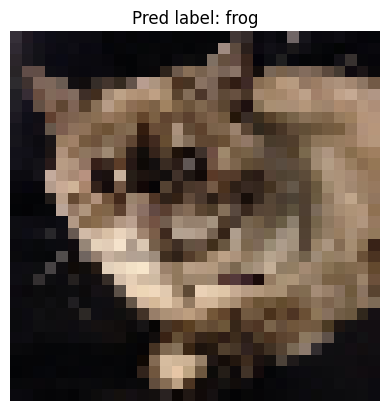

In [49]:
evaluate(model_1, img)

In [52]:
# Train for 10 epochs and add 10 more layers
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_2 = TinyVGG(input_shape=3,
                  hidden_units=20,
                  output_shape=len(class_names)).to(device)

loss_fn=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.001)

model_2_results = train(model=model_2,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        epochs=10)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.6073 | train_acc: 0.4201 | test_loss: 1.3460 | test_acc: 0.5209
Epoch: 2 | train_loss: 1.2088 | train_acc: 0.5732 | test_loss: 1.1002 | test_acc: 0.6082
Epoch: 3 | train_loss: 1.0517 | train_acc: 0.6334 | test_loss: 1.0103 | test_acc: 0.6419
Epoch: 4 | train_loss: 0.9589 | train_acc: 0.6636 | test_loss: 0.9546 | test_acc: 0.6684
Epoch: 5 | train_loss: 0.8945 | train_acc: 0.6885 | test_loss: 0.9275 | test_acc: 0.6750
Epoch: 6 | train_loss: 0.8478 | train_acc: 0.7037 | test_loss: 0.9072 | test_acc: 0.6903
Epoch: 7 | train_loss: 0.8141 | train_acc: 0.7151 | test_loss: 0.8539 | test_acc: 0.7025
Epoch: 8 | train_loss: 0.7813 | train_acc: 0.7273 | test_loss: 0.8695 | test_acc: 0.7016
Epoch: 9 | train_loss: 0.7610 | train_acc: 0.7332 | test_loss: 0.8406 | test_acc: 0.7082
Epoch: 10 | train_loss: 0.7405 | train_acc: 0.7403 | test_loss: 0.8201 | test_acc: 0.7179


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


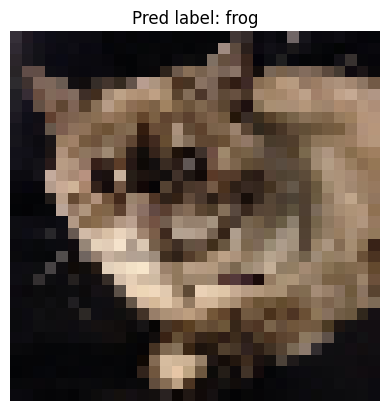

In [54]:
evaluate(model_2, img)

### Is it even prediciting other classes, Let's check it out

In [55]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred prob off the gpu for further calculations (matplotlib doesn't do GPU)
      pred_probs.append(pred_prob.cpu())

  # Stack the pred probs to turn list into a tensor
  return torch.stack(pred_probs)

In [57]:
import random
#random.seed(42)
test_samples = []
test_labels = []

for sample, label, in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([3, 32, 32])

In [58]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

pred_probs[:2]

tensor([[1.0138e-06, 7.8464e-07, 5.5897e-03, 3.0874e-03, 7.4592e-03, 3.1775e-03,
         9.8043e-01, 2.4866e-04, 1.7085e-06, 4.8811e-06],
        [2.0676e-05, 2.3700e-06, 1.2350e-03, 1.0734e-03, 4.1771e-02, 1.7640e-04,
         9.5368e-01, 2.0376e-03, 1.2806e-06, 1.2477e-06]])

In [60]:
# Convert pred probs to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([6, 6, 9, 3, 4, 2, 4, 0, 8])

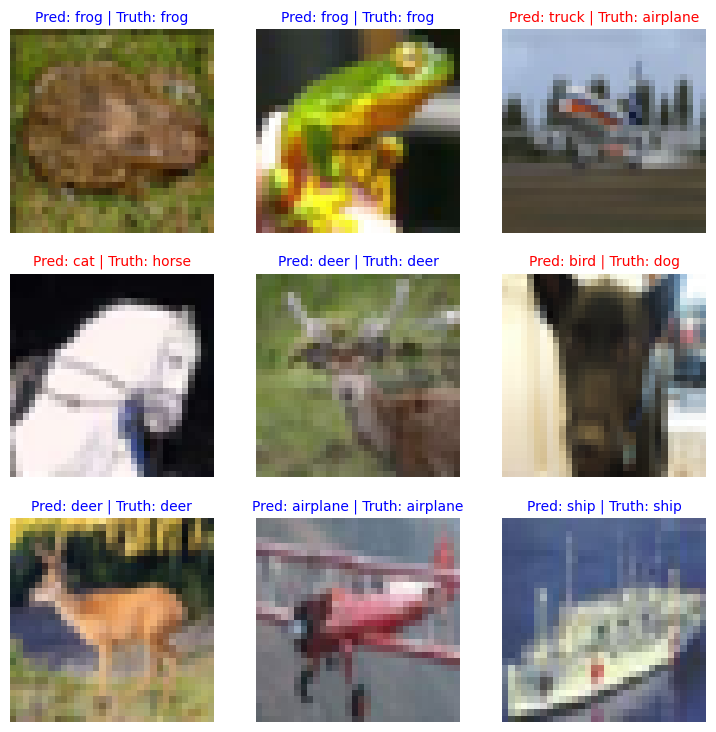

In [64]:
# plot predictions
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # plot the target image
  plt.imshow(sample.squeeze().permute(1,2,0))

  # Find the prediction (in text form, e.g "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c='b')
  else:
    plt.title(title_text, fontsize=10, c='r')
  plt.axis(False);